# Handwash Report

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


### Read the yearly dataset

In [2]:
yearly_data= pd.read_csv("yearly_deaths_by_clinic.csv")

yearly_data

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [3]:
yearly_data.shape

(12, 4)

In [4]:
yearly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


In [5]:
yearly_data.groupby("clinic") ["deaths"].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

#### The above results shows us the number of births and deaths in 2 clinics from the year 1841 till 1846. It's obvious that the number of deaths in clinic 1 is higher than that of clinic 2. 

In [6]:
#To make the analysis easier, we can calculate the proportion of deaths.
yearly_data["Proportion of Deaths"] = yearly_data["deaths"] / yearly_data["births"]
yearly_data

,year,births,deaths,clinic,Proportion of Deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [7]:
#Separate the dataset into 2 datasets, one for each clinic
clinic_1 = yearly_data[yearly_data["clinic"] == "clinic 1"]
clinic_2 = yearly_data[yearly_data["clinic"] == "clinic 2"]


In [8]:
clinic_1

,year,births,deaths,clinic,Proportion of Deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [9]:
clinic_2

,year,births,deaths,clinic,Proportion of Deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


Text(0, 0.5, 'Number of Deaths')

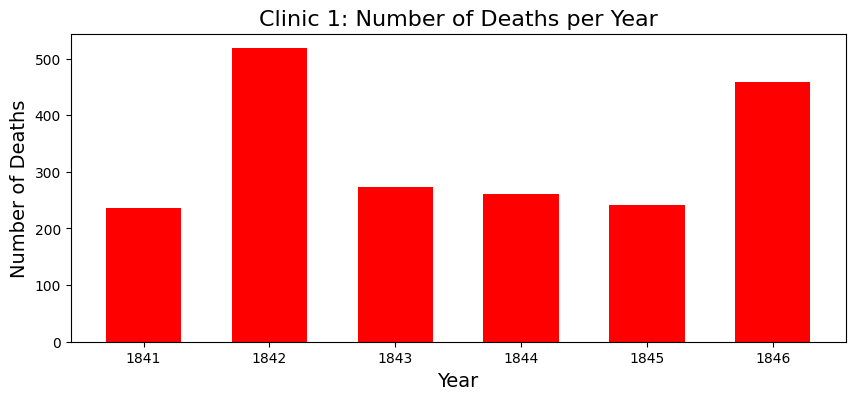

In [10]:
#Visualize the Number of deaths every year in clinic 1
fig,ax = plt.subplots(figsize = (10,4))
plt.bar(clinic_1.year, clinic_1.deaths, width= 0.6, color= "red")
plt.title("Clinic 1: Number of Deaths per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

Text(0, 0.5, 'Number of Deaths')

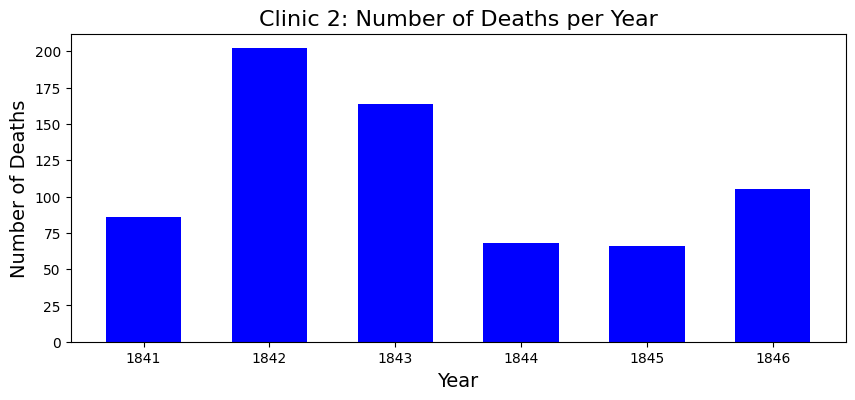

In [16]:
#Visualize the Number of deaths every year in clinic 2
fig,ax = plt.subplots(figsize = (10,4))
plt.bar(clinic_2.year, clinic_2.deaths, width= 0.6, color= "blue")
plt.title("Clinic 2: Number of Deaths per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)

#### It seems that 1842 was a pretty hectic year in both clinic 1 & 2 where the numbers of deaths were 518 and 202 respectively

#### Plot the proportion of deaths in clinic 1 and 2

<Axes: xlabel='year', ylabel='Proportion of Deaths'>

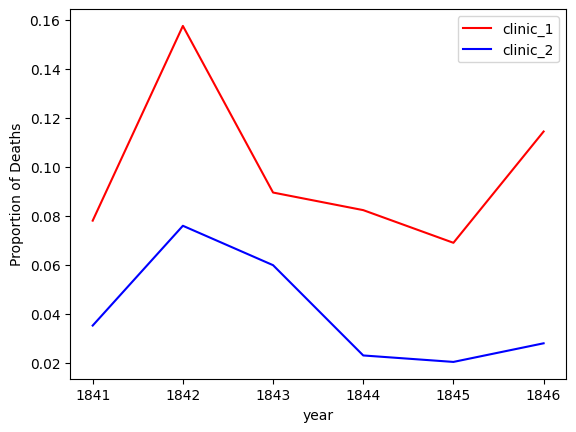

In [17]:
ax= clinic_1.plot(x= "year", y= "Proportion of Deaths", label= "clinic_1", color="red")
clinic_2.plot(x= "year", y= "Proportion of Deaths", label= "clinic_2", ax=ax, ylabel= "Proportion of Deaths", color="blue")

## By looking further into why this happened, Dr Semmelweis realized that many medical students worked at clinic 1 who also as a part of their study, spend a lot of time in the autopsy room. So, he realized that dealing with corpses spread bacteria that would be transferred to the women giving birth, infecting them with the deadly childbed fever, which was the main reason for the high mortality rates. 


# II- Monthly data

In [18]:
# Read the monthly dataset
monthly_data = pd.read_csv("monthly_deaths.csv")
monthly_data.head(5)

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [19]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [20]:
#Calculate the proportion of deaths per month
monthly_data["Proportion of Deaths"]= monthly_data["deaths"] / monthly_data["births"]
monthly_data.head(5)

,date,births,deaths,Proportion of Deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


## Dr Semmelweis ordered the doctors to wash their hands and made it obligatory in the summer of 1847 to see if that will affect the number of deaths, and since we have the monthly data now, we can trace the number of deaths before and after the handwashing started. 

In [21]:
#Change the data type of "date" column from string to datatime
monthly_data.dtypes
monthly_data['date'] =  pd.to_datetime(monthly_data['date'])

In [22]:
# Label the date at which handwashing started to "start_handwashing"
start_handwashing = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly_data[monthly_data["date"] < start_handwashing]
after_washing = monthly_data[monthly_data["date"] >= start_handwashing]

## Before Handwashing

Text(0, 0.5, 'Proportion of Deaths')

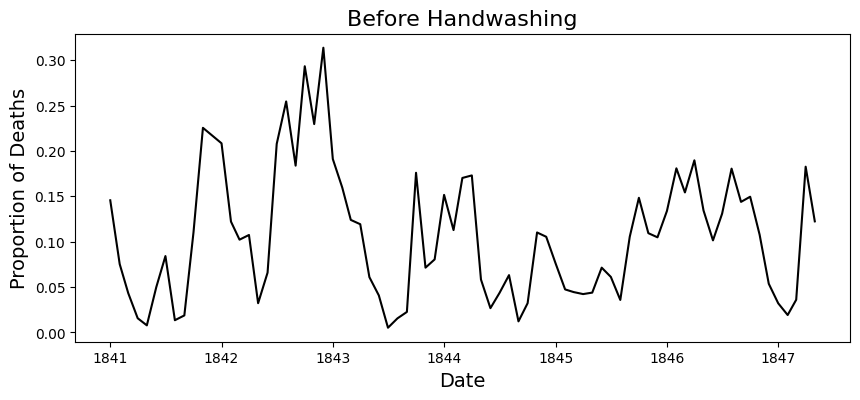

In [23]:
fig,ax = plt.subplots(figsize = (10,4))
x= before_washing["date"]
y= before_washing["Proportion of Deaths"]
plt.plot(x, y, color= "black")
plt.title("Before Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)

## After Handwashing

Text(0, 0.5, 'Proportion of Deaths')

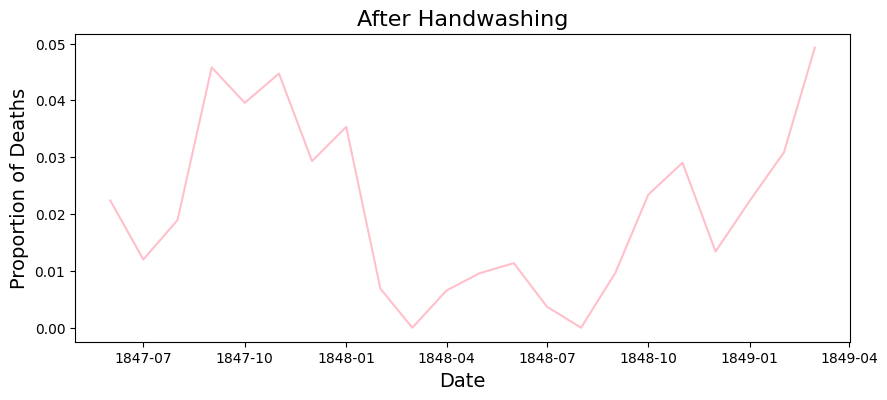

In [24]:
fig,ax = plt.subplots(figsize = (10,4))
x= after_washing["date"]
y= after_washing["Proportion of Deaths"]
plt.plot(x, y, color= "pink")
plt.title("After Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)

## To see the difference clearly, let's combine the 2 plots in one chart.

<Axes: xlabel='date', ylabel='Proportion deaths'>

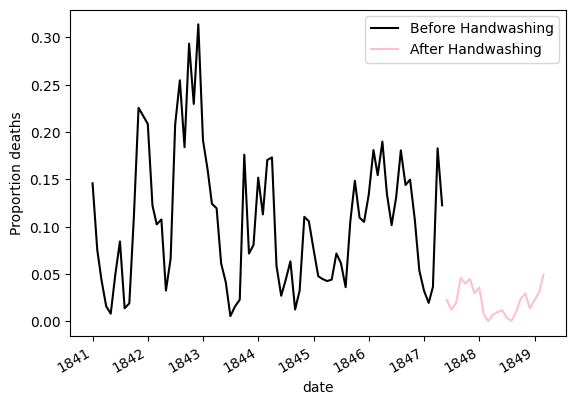

In [25]:
ax= before_washing.plot(x= "date", y= "Proportion of Deaths", label= "Before Handwashing", color="black")
after_washing.plot(x= "date", y= "Proportion of Deaths", label= "After Handwashing", ax=ax, ylabel= "Proportion deaths", color="pink") 

### The difference is pretty clear! the proportion of deaths dramatically decreased after handwashing was made obligatory.

## Let's calculate exactly how much did handwashing decreased the proportion of deaths on average.

In [26]:
before_proportion = before_washing["Proportion of Deaths"]
after_proportion = after_washing["Proportion of Deaths"]
before_proportion.mean()

0.10504998260908789

In [27]:
after_proportion.mean()

0.021093375097254535

In [28]:
# Calculate the difference between both proportions
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336

## The minus sign indicate that there is a decrease. So handwashing decreased the proportion of deaths from 10% to 2% i.e, by approximately 8%.

## Deliverables
# Data Loading and Exploration
We loaded the historical datasets into Pandas DataFrames and examined their structure. We also calculated the total number of deaths by clinic and the proportion of deaths.

# Analysis of the Relationship Between Variables
We analyzed relationships between variables, such as year, deaths, births, and the implementation of handwashing. We visualized the number of deaths and the proportion of deaths over time in each clinic.

# Calculations to Compare Mortality Rates
We calculated the average mortality rates before and after the implementation of handwashing, showing a significant reduction in mortality rates post-implementation. The difference in proportions before and after handwashing was calculated and found to be significant.

# Data Visualizations
We created visualizations to illustrate the impact of handwashing on reducing mortality rates:

Bar charts showing the number of deaths per year in each clinic.
Line charts showing the proportion of deaths over time in each clinic.
Line charts showing the proportion of deaths before and after handwashing.
Learning Outcomes
By completing this project, we gained the following skills and knowledge:

Data handling and exploration in Python using Pandas.
Analyzing the relationship between variables over time.
Performing calculations to derive new insights.
Visualizing data to understand the effect of handwashing.

## This project not only replicates Dr. Semmelweis's discovery but also emphasizes the significance of data analysis in healthcare and the profound impact of simple interventions like handwashing.








